# Fake news Detection
#### Fake news on different platforms is spreading widely and is a matter of serious concern, as it causes social wars and permanent breakage of the bonds established among people. A lot of research is already going on focused on the classification of fake news.

Code: https://www.kaggle.com/rodolfoluna/fake-news-detector


## Steps to be followed
#### 1- Importing Libraries and Datasets
#### 2-Data Preprocessing
#### 3-Preprocessing and analysis of News column
#### 4-Converting text into Vectors
#### 5-Model training, Evaluation, and Prediction

### Importing required library
Here we are going to importing some of the required library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### Inserting fake and real dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

### Data Preprocessing

In [4]:
df_fake.isna().sum() #NaN
df_true.isna().sum() #NaN

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [6]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [9]:
df_fake["target"] = 'fake'
df_true["target"] = 'true'

Merging the main fake and true dataframe

In [17]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# Preprocessing and analysis of News column

### Data cleaning and preparation

In [18]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

#### "title" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [19]:
df = df_marge.drop(["title","date"], axis = 1)

#### Randomly shuffling the dataframe 

In [21]:
# Shuffle the data
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [26]:
df.head()

,text,subject,target
0,Hey mainstream media when are you going to tak...,left-news,fake
1,Republicans are in for a long four years if th...,News,fake
2,After Donald Trump gave out Lindsey Graham s c...,politics,fake
3,"Oh the irony, of our Nobel-Peace-Prize-Recipie...",politics,fake
4,WASHINGTON (Reuters) - A U.S. State Department...,politicsNews,true


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr, punctuation and links .

In [27]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    all_list = [char for char in text if char not in string.punctuation]
    text = ''.join(all_list)

    return text

In [28]:
df["text"] = df["text"].apply(wordopt)

In [29]:
# Check
df.head()

,text,subject,target
0,hey mainstream media when are you going to tak...,left-news,fake
1,republicans are in for a long four years if th...,News,fake
2,after donald trump gave out lindsey graham s c...,politics,fake
3,oh the irony of our nobel peace prize recipie...,politics,fake
4,washington reuters a u s state department...,politicsNews,true


In [30]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Check
df.head()

,text,subject,target
0,hey mainstream media going take break manufact...,left-news,fake
1,republicans long four years think progressives...,News,fake
2,donald trump gave lindsey graham cell phone nu...,politics,fake
3,oh irony nobel peace prize recipient chief sta...,politics,fake
4,washington reuters u state department spokesma...,politicsNews,true


### Basic data exploration


subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


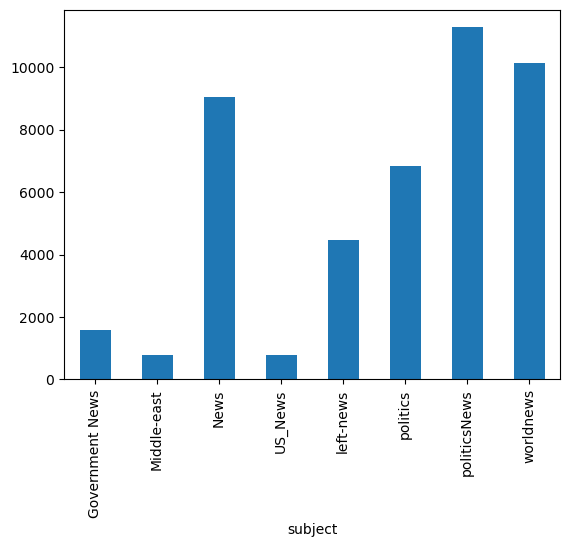

In [32]:
# How many articles per subject?
print(df_marge.groupby(['subject'])['text'].count())
df_marge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23471
true    21407
Name: text, dtype: int64


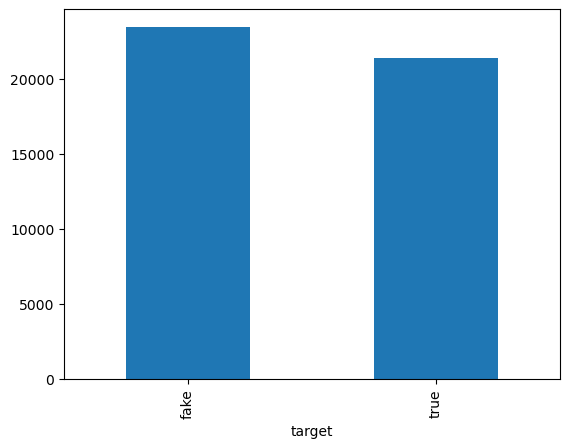

In [33]:
# How many fake and real articles?
print(df.groupby(['target'])['text'].count())
df.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

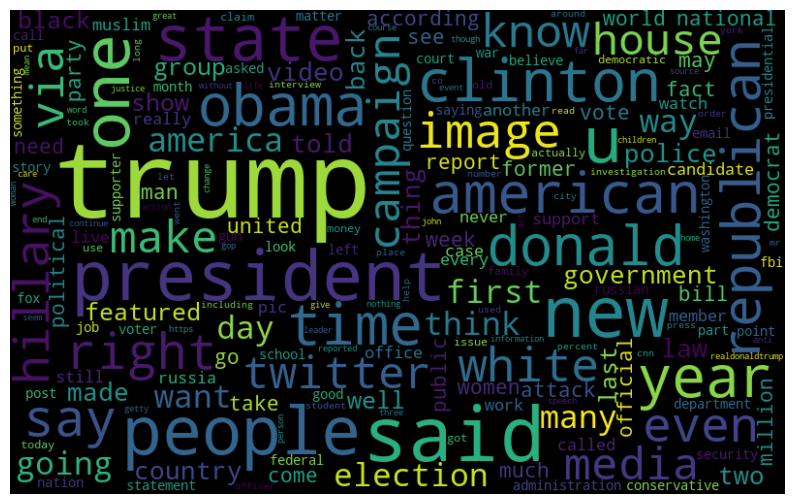

In [34]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


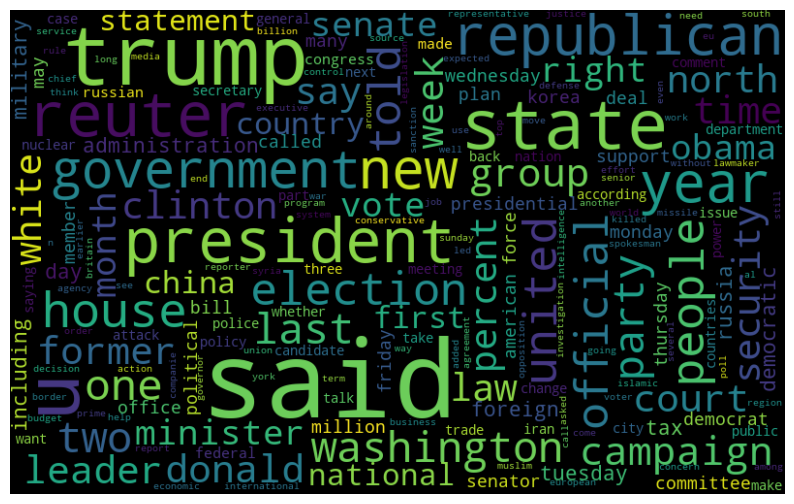

In [35]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df[df["target"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'purple')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

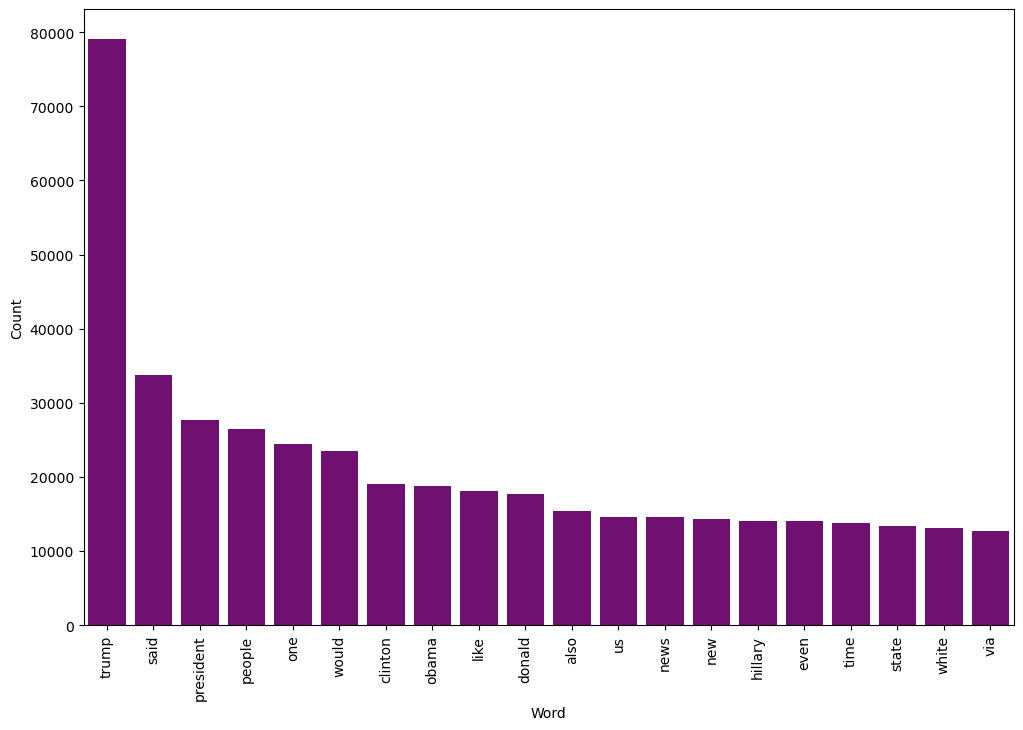

In [37]:
# Most frequent words in fake news
counter(df[df["target"] == "fake"], "text", 20)

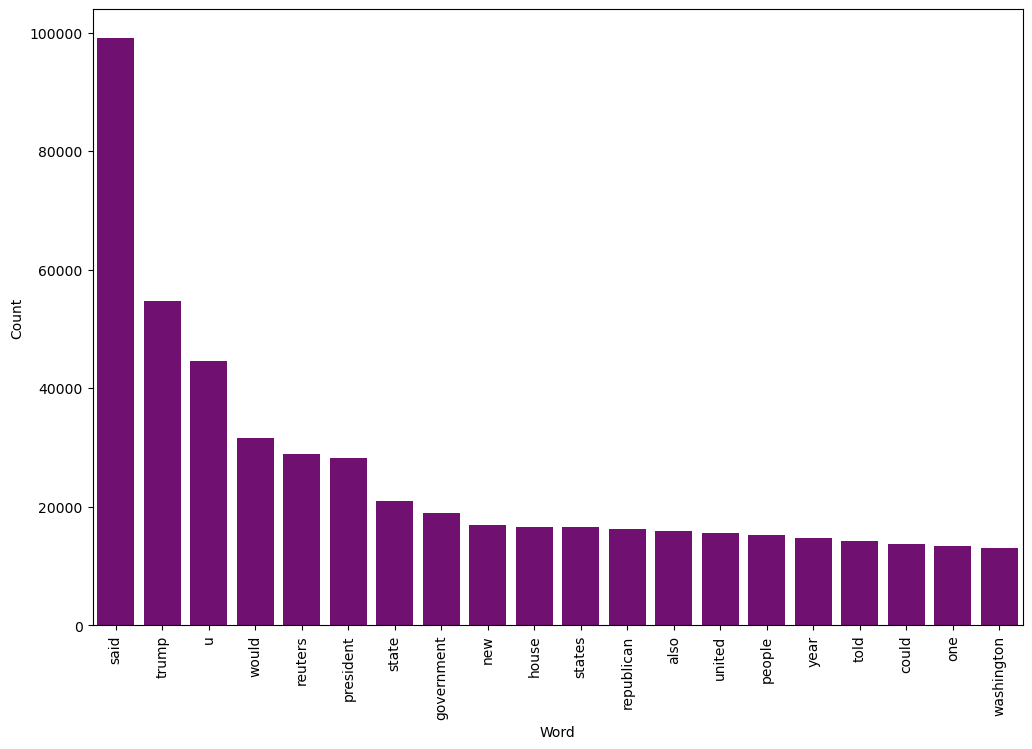

In [38]:
# Most frequent words in real news
counter(df[df["target"] == "true"], "text", 20)

### Modeling

In [39]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Defining dependent and independent variable as x and y

In [40]:
x = df["text"]
y = df["target"]

#### Splitting the dataset into training set and testing set. 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Model training, Evaluation, and Prediction

### 1. Logistic Regression

In [44]:
dct = dict()
TM=dict()
from sklearn.linear_model import LogisticRegression
import time


In [45]:
t0=time.time()
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)

t1=time.time()
print("accuracy: {}%".format(round(LR.score(xv_test, y_test)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, pred_lr)*100,2)
TM['Logistic Regression'] = round(t1-t0)

accuracy: 98.86%


Confusion matrix, without normalization
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      5800
        true       0.99      0.99      0.99      5420

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

The time take 1.528482437133789


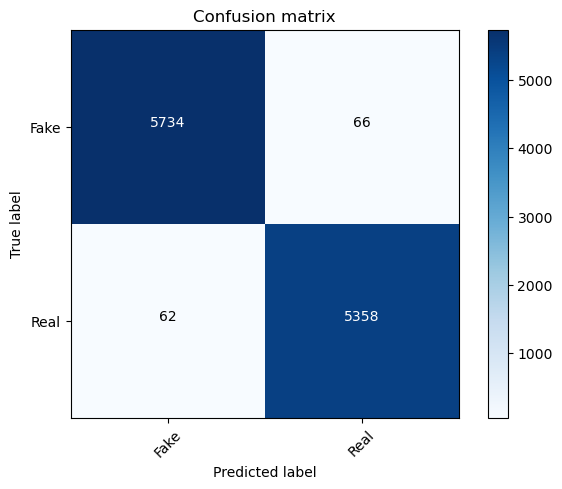

In [48]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
print(classification_report(y_test, pred_lr))
print("The time take",(t1-t0))

### 2. Decision Tree Classification

In [49]:
from sklearn.tree import DecisionTreeClassifier
import time

In [50]:
t0=time.time()
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
t1=time.time()
print("accuracy: {}%".format(round(DT.score(xv_test, y_test)*100,2)))


accuracy: 99.58%


Confusion matrix, without normalization
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      5800
        true       1.00      1.00      1.00      5420

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

The time take 17.448297262191772


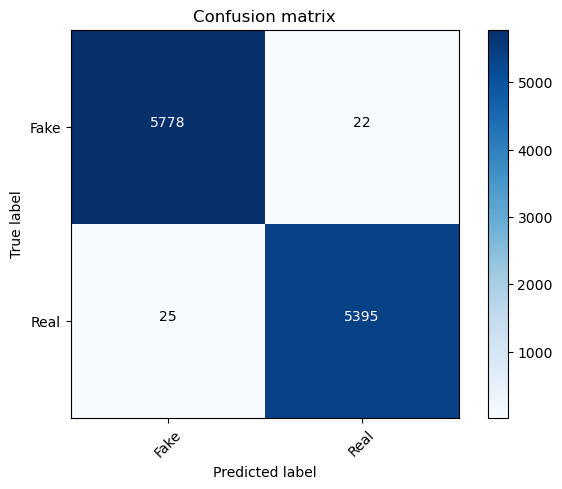

In [51]:
DT = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(DT, classes=['Fake', 'Real'])
print(classification_report(y_test, pred_dt))
print("The time take",(t1-t0))
dct['Decision Tree'] = round(accuracy_score(y_test, pred_dt)*100,2)
TM['Decision Tree'] = round(t1-t0)

### 3. Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [53]:
t0=time.time()
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)

t1=time.time()
print("accuracy: {}%".format(round(GBC.score(xv_test, y_test)*100,2)))

accuracy: 99.59%


Confusion matrix, without normalization
              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      5800
        true       0.99      1.00      1.00      5420

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

The time Take 147.72293543815613


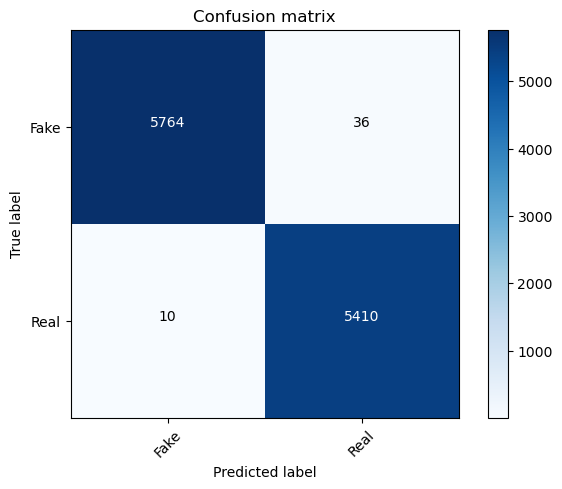

In [54]:
GB = metrics.confusion_matrix(y_test, pred_gbc)


plot_confusion_matrix(GB, classes=['Fake', 'Real'])
print(classification_report(y_test, pred_gbc))
print("The time Take",(t1-t0))
dct['Gradient Boosting'] = round(accuracy_score(y_test, pred_gbc)*100,2)
TM['Gradient Boosting'] = round(t1-t0)

### 4. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
import time

In [56]:
t0=time.time()
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
t1=time.time()
print("accuracy: {}%".format(round(RFC.score(xv_test, y_test)*100,2)))

accuracy: 99.03%


Confusion matrix, without normalization
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      5800
        true       0.99      0.99      0.99      5420

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

The time Take 51.64417219161987


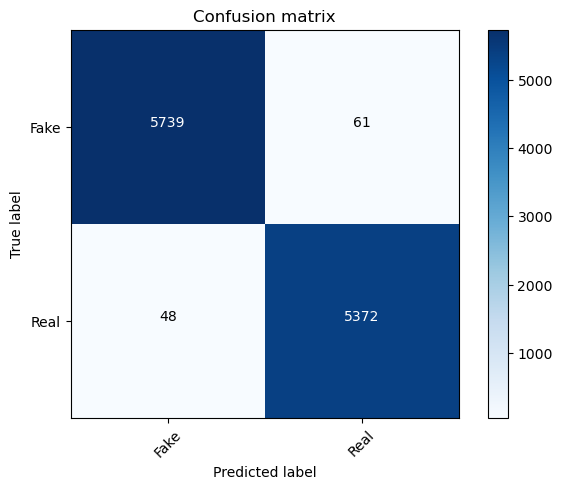

In [57]:
RF = metrics.confusion_matrix(y_test, pred_rfc)

plot_confusion_matrix(RF, classes=['Fake', 'Real'])
print(classification_report(y_test, pred_rfc))
print("The time Take",(t1-t0))
dct['Random Forest'] = round(accuracy_score(y_test, pred_rfc)*100,2)
TM['Random Forest'] = round(t1-t0)

### 5. SVM

In [58]:
from sklearn import svm
import time

In [59]:
t0=time.time()
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(xv_train, y_train)
pred_clf = clf.predict(xv_test)
t1=time.time()
print("accuracy: {}%".format(round(clf.score(xv_test, y_test)*100,2)))

accuracy: 99.49%


Confusion matrix, without normalization
              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      5800
        true       0.99      1.00      0.99      5420

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

The time Take 610.2024352550507


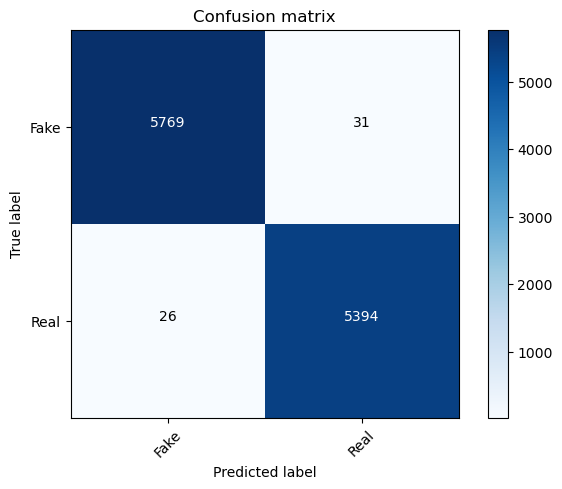

In [60]:
SV = metrics.confusion_matrix(y_test, pred_clf)

plot_confusion_matrix(SV, classes=['Fake', 'Real'])
print(classification_report(y_test, pred_clf))
print("The time Take",(t1-t0))
dct['SVM'] = round(accuracy_score(y_test, pred_clf)*100,2)
TM['SVM'] = round(t1-t0)

### 6.Naive Bayes


In [61]:
from sklearn.naive_bayes import MultinomialNB
import time

In [62]:
#Create a NB Classifier
t0=time.time()
NB_classifier = MultinomialNB()
NB_classifier.fit(xv_train, y_train)
pred_NB = NB_classifier.predict(xv_test)

t1=time.time()
print("accuracy: {}%".format(round(NB_classifier.score(xv_test, y_test)*100,2)))

accuracy: 93.76%


Confusion matrix, without normalization
              precision    recall  f1-score   support

        fake       0.93      0.95      0.94      5800
        true       0.94      0.93      0.94      5420

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220

The time Take 0.11073017120361328


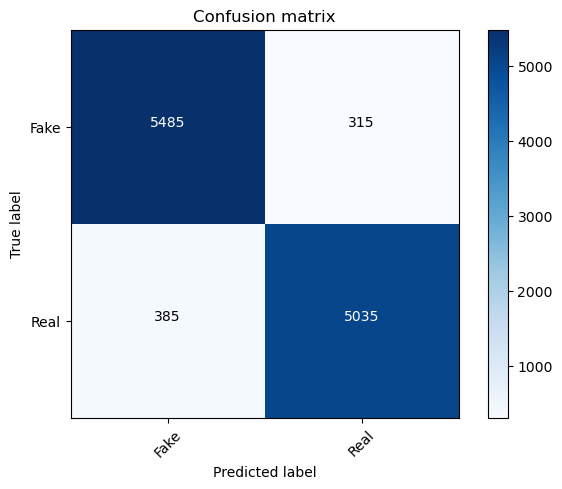

In [63]:
NB = metrics.confusion_matrix(y_test, pred_NB)

plot_confusion_matrix(NB, classes=['Fake', 'Real'])
print(classification_report(y_test, pred_NB))
print("The time Take",(t1-t0))
dct['Naive Bayes'] = round(accuracy_score(y_test, pred_NB)*100,2)
TM['Naive Bayes'] = round(t1-t0)

## Comparing Different Models

### Compare between accuracy

([<matplotlib.axis.YTick at 0x19a3138b5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

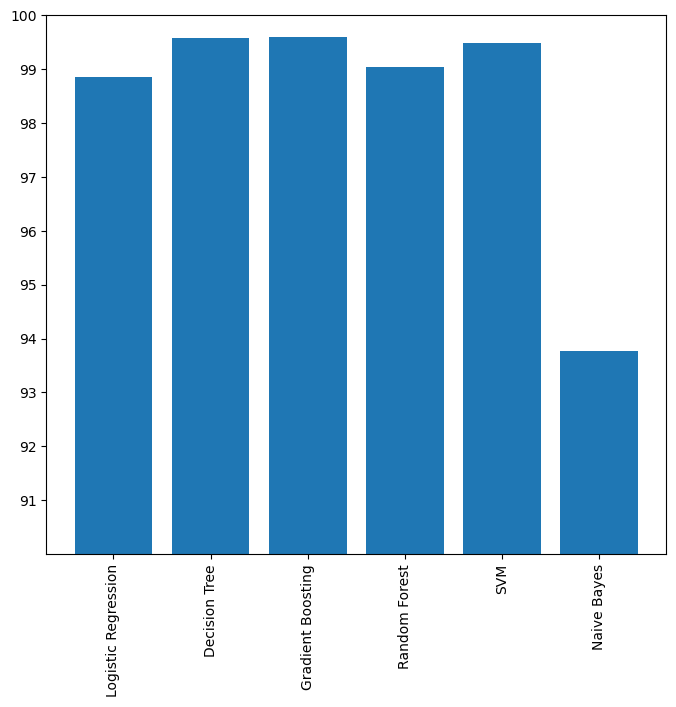

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.xticks(rotation='vertical')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

### Compare between Time

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

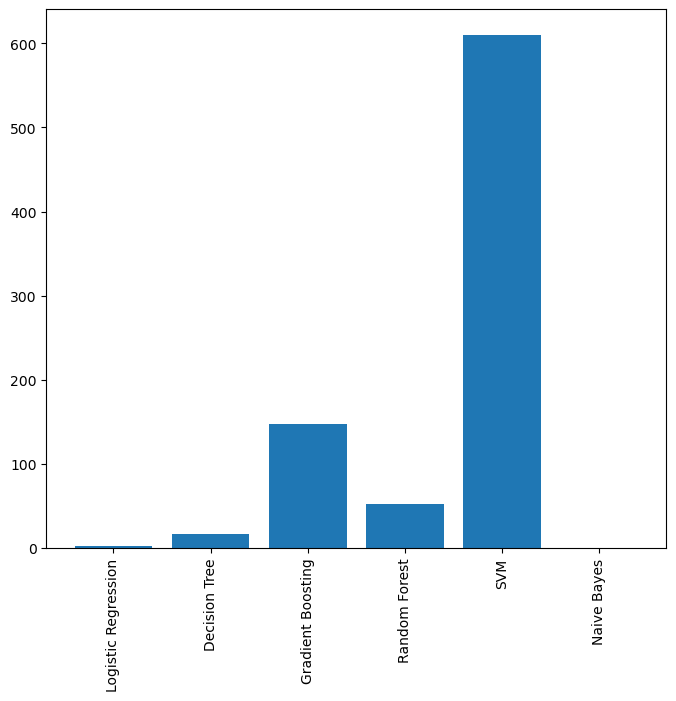

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(TM.keys()),list(TM.values()))
plt.xticks(rotation='vertical')